# Flood prediction Model

In [4]:
#Import some basic libraries
import numpy as np
import pandas as pd

# Data Insight

In [5]:
#Read the data present in dataset
data = pd.read_csv(r"C:\Users\navee\naveen\kerala.csv")
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [6]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [7]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [43]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [44]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [45]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

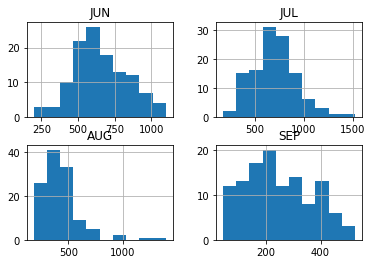

In [46]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [47]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [48]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
37,1938,0.3,79.0,53.3,164.5,179.6,681.6,648.6,287.9,223.2,223.7,69.5,22.9
94,1995,10.3,6.5,37.3,134.9,355.6,493.4,702.5,457.3,280.0,198.3,182.6,0.1
58,1959,3.0,21.4,6.3,150.7,347.2,872.8,1155.7,397.3,405.5,200.4,151.9,34.0
91,1992,2.4,0.9,0.1,43.0,218.4,819.3,767.8,508.0,297.5,290.7,287.6,3.7
55,1956,7.9,11.7,15.1,151.6,351.3,755.4,466.8,319.5,178.4,353.3,178.2,9.1


In [50]:
y_train.head()

37    0
94    0
58    1
91    1
55    0
Name: FLOODS, dtype: int64

# Prediction Algorithms:

# 1. KNN Classifier

In [51]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [52]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0]


In [53]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
70     1
46     1
102    0
9      0
116    0
92     0
42     1
12     0
14     1
72     0
34     0
17     0
78     0
86     0
109    1
15     1
1      1
108    0
22     1
89     0
65     0
5      0
24     1
85     0
Name: FLOODS, dtype: int64


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [56]:
knn_accuracy.mean()

0.7083333333333334

# 2. Logistic Regression

In [57]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [59]:
lr_accuracy.mean()

0.625

In [60]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0]


In [61]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0]


In [62]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 83.333333
recall score: 88.888889
roc score: 84.444444


# 3. Decision tree classification

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.71875   , 0.64516129, 0.61290323])

In [64]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]


In [65]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0]


In [66]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:70.833333
recall score:77.777778
roc score:72.222222
